# Prediction of daily Bike Rental

### Business Case :-
> * a bike rental prediction system is essential for enhancing customer satisfaction in the growing bike-sharing industry. By accurately forecasting daily bike rentals based on factors like weather, seasonality, and local events, companies can ensure the right number of bikes are available at high-demand locations, reducing wait times and maximizing rental opportunities. This data-driven approach not only lowers operational costs and improves resource allocation but also supports sustainability goals by promoting eco-friendly transportation. Ultimately, investing in such a predictive system can lead to increased revenue, higher customer loyalty, and a positive impact on urban mobility.

> * A well-designed prediction system can help lower costs by ensuring bikes are placed where they are needed most, reducing the need to move them around unnecessarily. It allows companies to make smart decisions based on data, helping them create better marketing strategies and services that match customer demand. Additionally, by encouraging more people to use bikes as a green transportation option, these systems help decrease traffic and cut down on pollution in cities. In short, investing in a bike rental prediction system improves operations and customer satisfaction while supporting environmental goals, making it essential for bike-sharing companies to succeed in a competitive market.

# Domain Analysis
#### Definition:
>  Domain analysis involves understanding a particular dataset, it includes importing libraries, loading datasets (like CSV files), and gathering information about the features in the dataset. 

#### Data Understanding

> * The "day.csv" dataset is part of the Bike Sharing Dataset, containing daily bike rental counts over 731 days.It includes 16 attributes such as date,
 season, weather conditions, and user types (casual vs. registered).Key features include normalized temperature, humidity, and wind speed, as well as
 total rental counts. This dataset is useful for analyzing bike rental trends and patterns, enabling predictive modeling to forecast demand based on
 various factors like seasonality and weather.

> * The inclusion of date, year, month, and day of the week allows for detailed time-series analyses. By examining rental patterns over different time
frames, stakeholders can identify peak rental periods, seasonal fluctuations, and trends that may emerge over the years. For instance, bike rentals may
surge during the summer months when weather conditions are more favorable for outdoor activities, while winter months may see a decline. Understanding 
these patterns can help bike-sharing companies optimize their operations, ensuring that bikes are available where and when they are most needed.m

In [64]:
# Importing the required libraries
import numpy as np  # For numerical computations and working with arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced visualizations and styling
import warnings  # For managing warnings in Python

# Ignore all warnings to keep the notebook clean
warnings.filterwarnings("ignore")

In [6]:
# Load the dataset from a CSV file
data = pd.read_csv("day.csv")  # Reads the 'day.csv' file into a DataFrame named 'data'
data  # View the dataset to ensure it loaded correctly

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

|            Feature            |            Description                                      |            Significance                               |
|:------------------------------|:----------------------------------------------------------|:-----------------------------------------------------|
| **instant**                   | Total number of entries in the dataset.                   | Helps in understanding the size of the dataset.      |
| **dteday**                    | Date of bike rentals recorded on a daily basis.           | Essential for time series analysis and trends.       |
| **season**                    | The season during which the bike rentals occurred.        | Influences rental patterns based on weather.         |
| **yr**                        | The year when the bike rental data was recorded.          | Important for analyzing trends over multiple years.  |
| **mnth**                      | The month of the year when the data was recorded.         | Helps in identifying seasonal trends.                |
| **holiday**                   | Indicates whether the day was a holiday (1 = yes, 0 = no).| Affects rental demand; holidays may increase usage.  |
| **weekday**                   | The day of the week when the bike was rented (0 = Sunday).| Useful for understanding weekly rental patterns.     |
| **workingday**                | Indicates if the day is a regular workday (1 = yes, 0 = no).| Helps in analyzing rental behavior on workdays vs. weekends. |
| **weathersit**                | Describes the weather conditions.                          | Weather can significantly impact bike rentals.       |
| **temp**                      | Recorded temperature in Celsius.                           | Affects user comfort and rental frequency.           |
| **atemp**                     | Normalized "feels like" temperature in Celsius.          | More accurately reflects user comfort.               |
| **hum**                       | Humidity level from 0 to 1 scale.                         | High humidity can deter bike rentals.                |
| **windspeed**                 | Normalized wind speed from 0 to 1 scale.                  | Wind conditions can influence biking comfort.        |
| **casual**                    | Count of casual bike users (non-registered).              | Important for understanding the user base.          |
| **registered**                | Count of registered bike users.                            | Indicates loyalty and potential for repeat rentals.   |
| **cnt**                       | Total count of bike rentals for the day.                  | The target variable for analysis and prediction.     |

# Basic Checks 
#### Definition:
> Basic checks ensuring quality in data analysis. It ensure that your dataset is clean and ready for analysis or modeling. Addressing issues related to data consistency, integrity, completeness, and distribution can significantly improve the performance and reliability of your models.

In [9]:
data.head()  # Displays the first 5 rows

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [10]:
data.tail()  # Displays the last 5 rows

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [11]:
data.info() # Displays non-null values and the data types of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
data.describe() # Describe statistical summary

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

#### Analysis :-
> * We can evaluate that cnt has maximum standard deviation (1937.211452)
> * We can evaluate that holiday posses mininum mean (0.028728)
> * We can evaluate that wheather posses values between 0 to 3

In [14]:
data.describe(include="O") # To get a summary of object (categorical) column

dteday
count          731
unique         731
top     2011-01-01
freq             1

#### Analysis :- 
> * We can eveluate that dteday only posses categorical values.

 # Exploratory Data Analysis

#### Definition:
  > Exploratory Data Analysis (EDA) is a process for analyzing and summarizing datasets to uncover patterns, trends, and relationships. It uses descriptive statistics and visualizations, such as charts and graphs, to identify key characteristics and detect outliers.

#### Distributed in three parts:
> * **Univariate Analysis**:- Univariate analysis is essential for gaining insights of individual variables, which can help in further analysis and decision-making.
> * **Bivariate Analysis**:- Bivariate analysis is for understanding how two variables influence each other, which can help decision-making and in further analysis.
> * **Multivariate Analysis**:- Multivariate analysis is for understanding the relation of multiple factors, to get more insights and also for decision-making in complex datasets.

In [19]:
for column in data:  # Iterates over all the columns
    print(column)  # Prints the name of columns

instant
dteday
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [20]:
# Convert 'dteday' to datetime and then to int64
data['dteday'] = pd.to_datetime(data['dteday']).astype('int64') 

In [21]:
data.info() # Dataset column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    int64  
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 91.5 KB


### Univeriant Analysis:-
> * Univariate analysis involves the examination of a single variable to find patterns in the data. It focuses on one variable at a time, to understand its distribution, central tendency (mean, median, mode) and  variation (range, variance, standard deviation) can also be calculated.

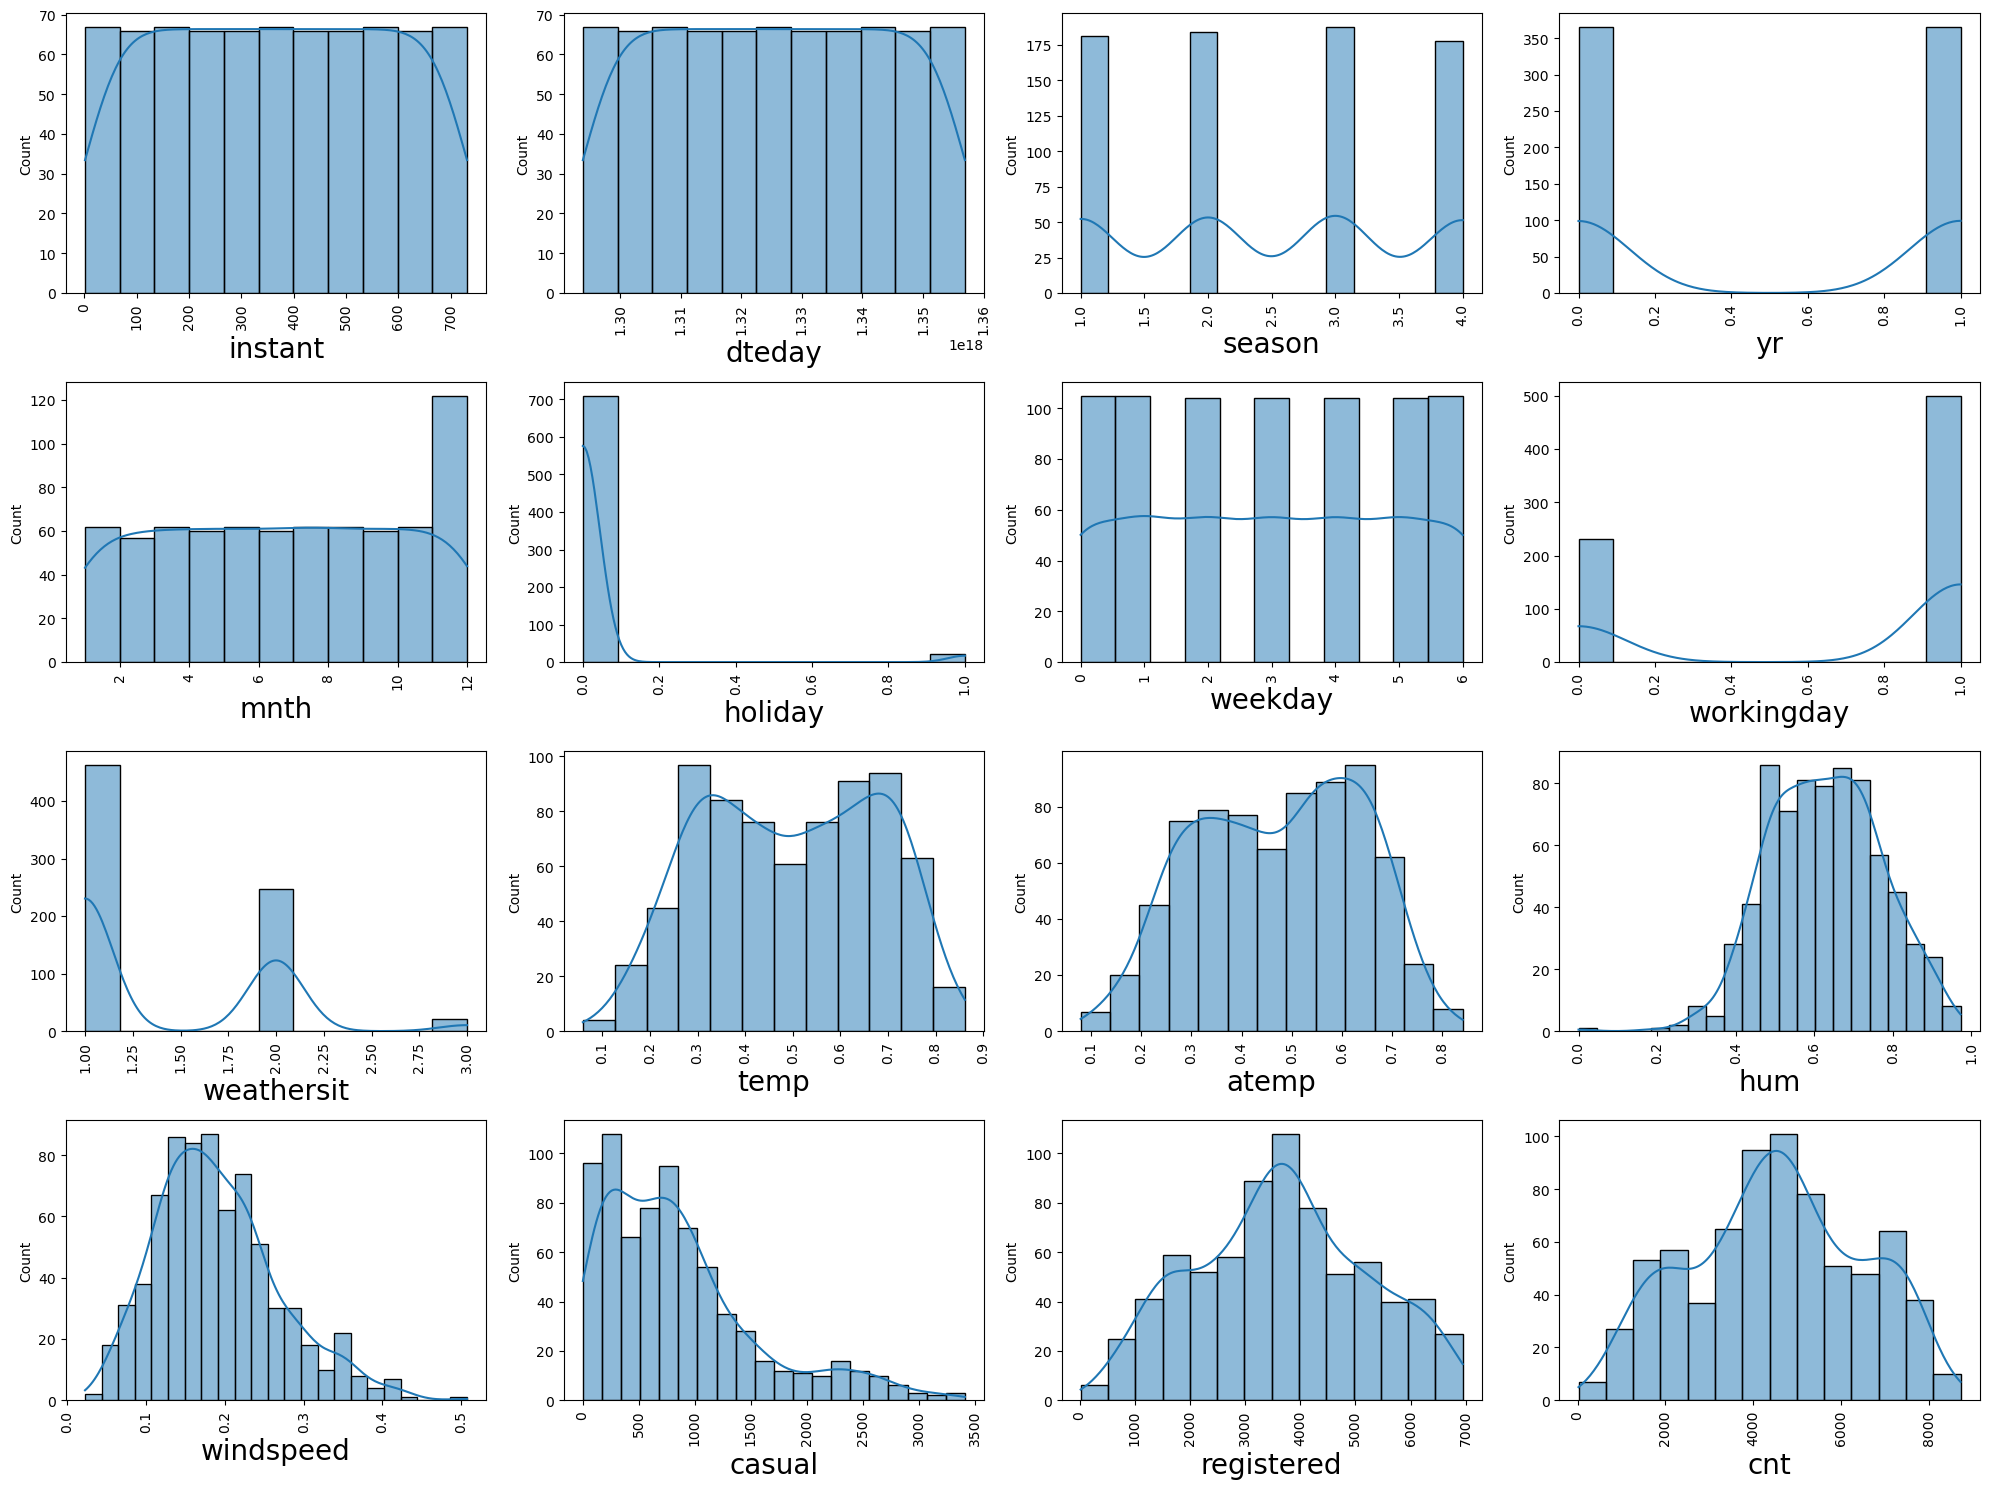

In [23]:
plt.figure(figsize=(20, 15))  # Set figure size

plt_num = 1  # Initialize subplot position counter

for column in data:  # Loop through columns
    if plt_num <= 16:  # Limit to 16 subplots
        plt.subplot(4, 4, plt_num)  # 4x4 grid for subplots
        sns.histplot(data[column], kde=True)  # Plot histogram with KDE
        plt.xlabel(column, fontsize=20)  # Set x-axis label
        plt.xticks(rotation=90)  # Rotate x-axis labels
    plt_num += 1  # Increment subplot counter

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plots

#### **Analysis**:-
> * Here detday follows uniformity in distribution.
> * Here mnth follows uniformity but in december it covers high datapoints.
> * Here casual follows right skewed distribution.
> * Here in holiday majority of days are non-holidays.  
> * Here registered follows normal-like distribution along with peak.

### Biavariant Analysis
> * Bivariate analysis involves the examination of two variables to find relationships and patterns in the data. It focuses on how the two variables interact with each other to understand their correlation, trends, and distribution.

In [37]:
# This step is performed when inputs and output are known.
# 1st variable will be Inputs
# 2nd variable will be output/target variable.

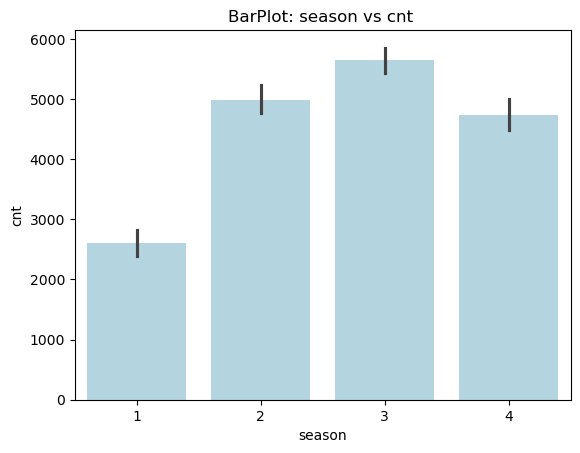

In [39]:
# BarPlot: season vs cnt
sns.barplot(x= data.season, y= data.cnt, data=data, color='lightblue') # season on x-axis and cnt on y-axis
plt.title("BarPlot: season vs cnt ") # Adding a title to the plot
plt.show() # Displaying the plot

#### **Analysis**:-
> * Here in winter least bike is rented. 
> * Here in summer maximum bike is rented.
> * Here spring and fall gives an average data points.

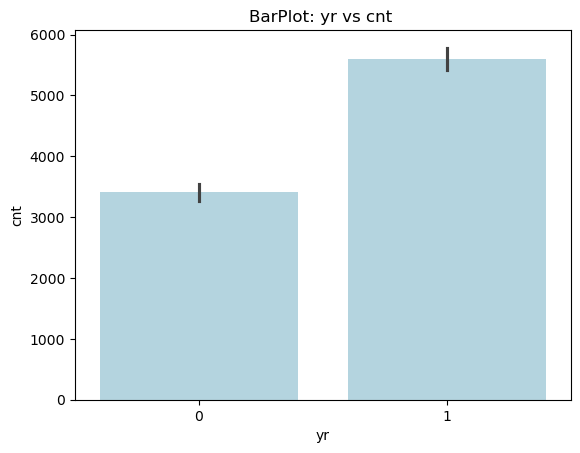

In [42]:
# BarPlot: yr vs cnt
sns.barplot(x= data.yr , y=data.cnt , data=data, color='lightblue') # yr on x-axis and cnt on y-axis
plt.title("BarPlot: yr vs cnt ") # Adding a title to the plot
plt.show() # Displaying the plot

#### **Analysis**:-
> * Here most data points covered by 1 (2012)
> * Here 0 (2011) gives less data points as compare

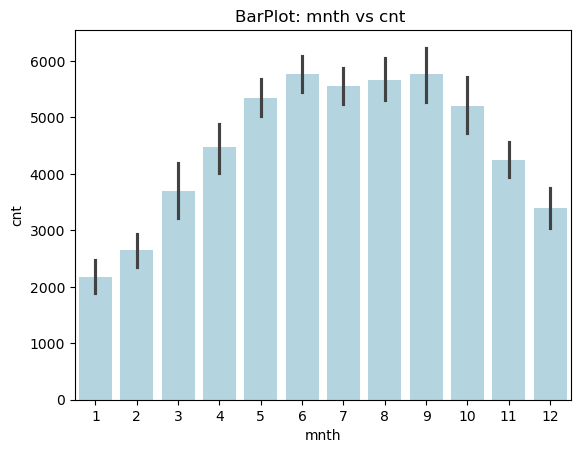

In [45]:
# BarPlot: mnth vs cnt
sns.barplot(x= data.mnth , y=data.cnt , data=data, color='lightblue') # mnth on x-axis and cnt on y-axis
plt.title("BarPlot: mnth vs cnt ") # Adding a title to the plot
plt.show() # Displaying the plot

#### **Analysis**:-
> * Here in 9th (september) mnth highest numbers of bike rented.
> * Here in 1st (january) mnth lowest numbers of bike rented.
> * Here between 5 to 10 mmaximum bike rented  .

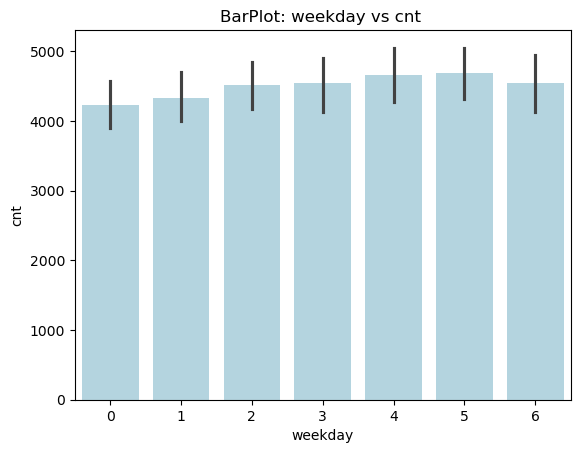

In [47]:
# BarPlot: weekday vs cnt
sns.barplot(x= data.weekday , y=data.cnt , data=data, color='lightblue') # weekday on x-axis and cnt on y-axis
plt.title("BarPlot: weekday vs cnt ") # Adding a title to the plot
plt.show() # Displaying the plot

#### **Analysis**:-
> * Here every days follows uniformity 
> * Here days 4 and 5 gives higest numbers of bike rented 
> * Here not so major changes seen in data points

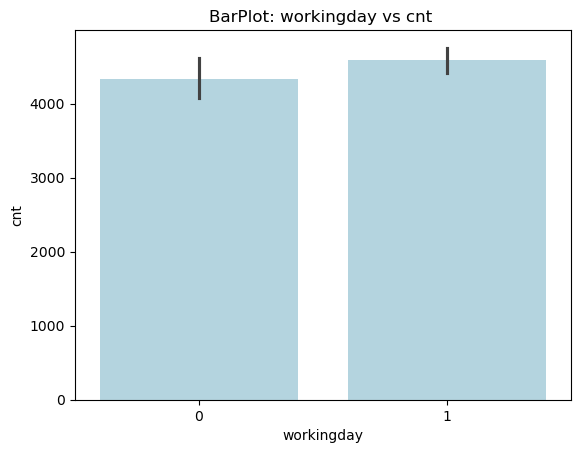

In [50]:
# BarPlot: workingday vs cnt
sns.barplot(x= data.workingday , y=data.cnt , data=data, color='lightblue') # workingday on x-axis and cnt on y-axis
plt.title("BarPlot: workingday vs cnt ") # Adding a title to the plot
plt.show() # Displaying the plot

#### **Analysis**:- 
> * Here in 1 working day maximum bike rented.
> * Here 0 has less data points as compare to working daym

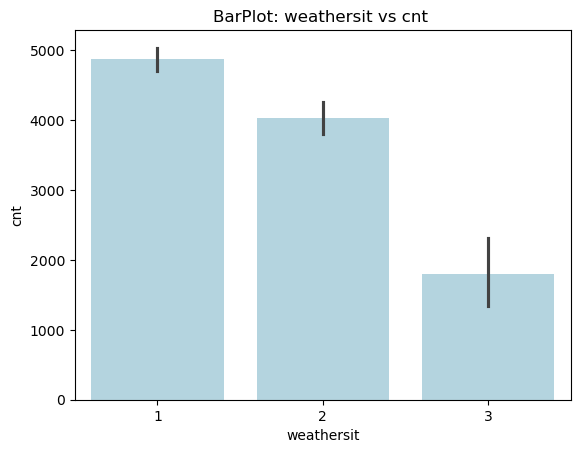

In [54]:
# BarPlot: weathersit vs cnt
sns.barplot(x= data.weathersit , y=data.cnt , data=data, color='lightblue') # weathersit on x-axis and cnt on y-axis
plt.title("BarPlot: weathersit vs cnt ") # Adding a title to the plot
plt.show() # Displaying the plot

#### **Analysis**:-
> * Here when wheather condition:1 maximum bike rented
> * Here wheather condition:3 describe that less bike rented.
> * Here wheather condition lying between 1 to 3

### Multivariant Analysis
> * Multivariate analysis involves the examination of three or more variables simultaneously to understand complex relationships and patterns in the data. It focuses on how multiple variables interact with each other and their combined effects on outcomes. 

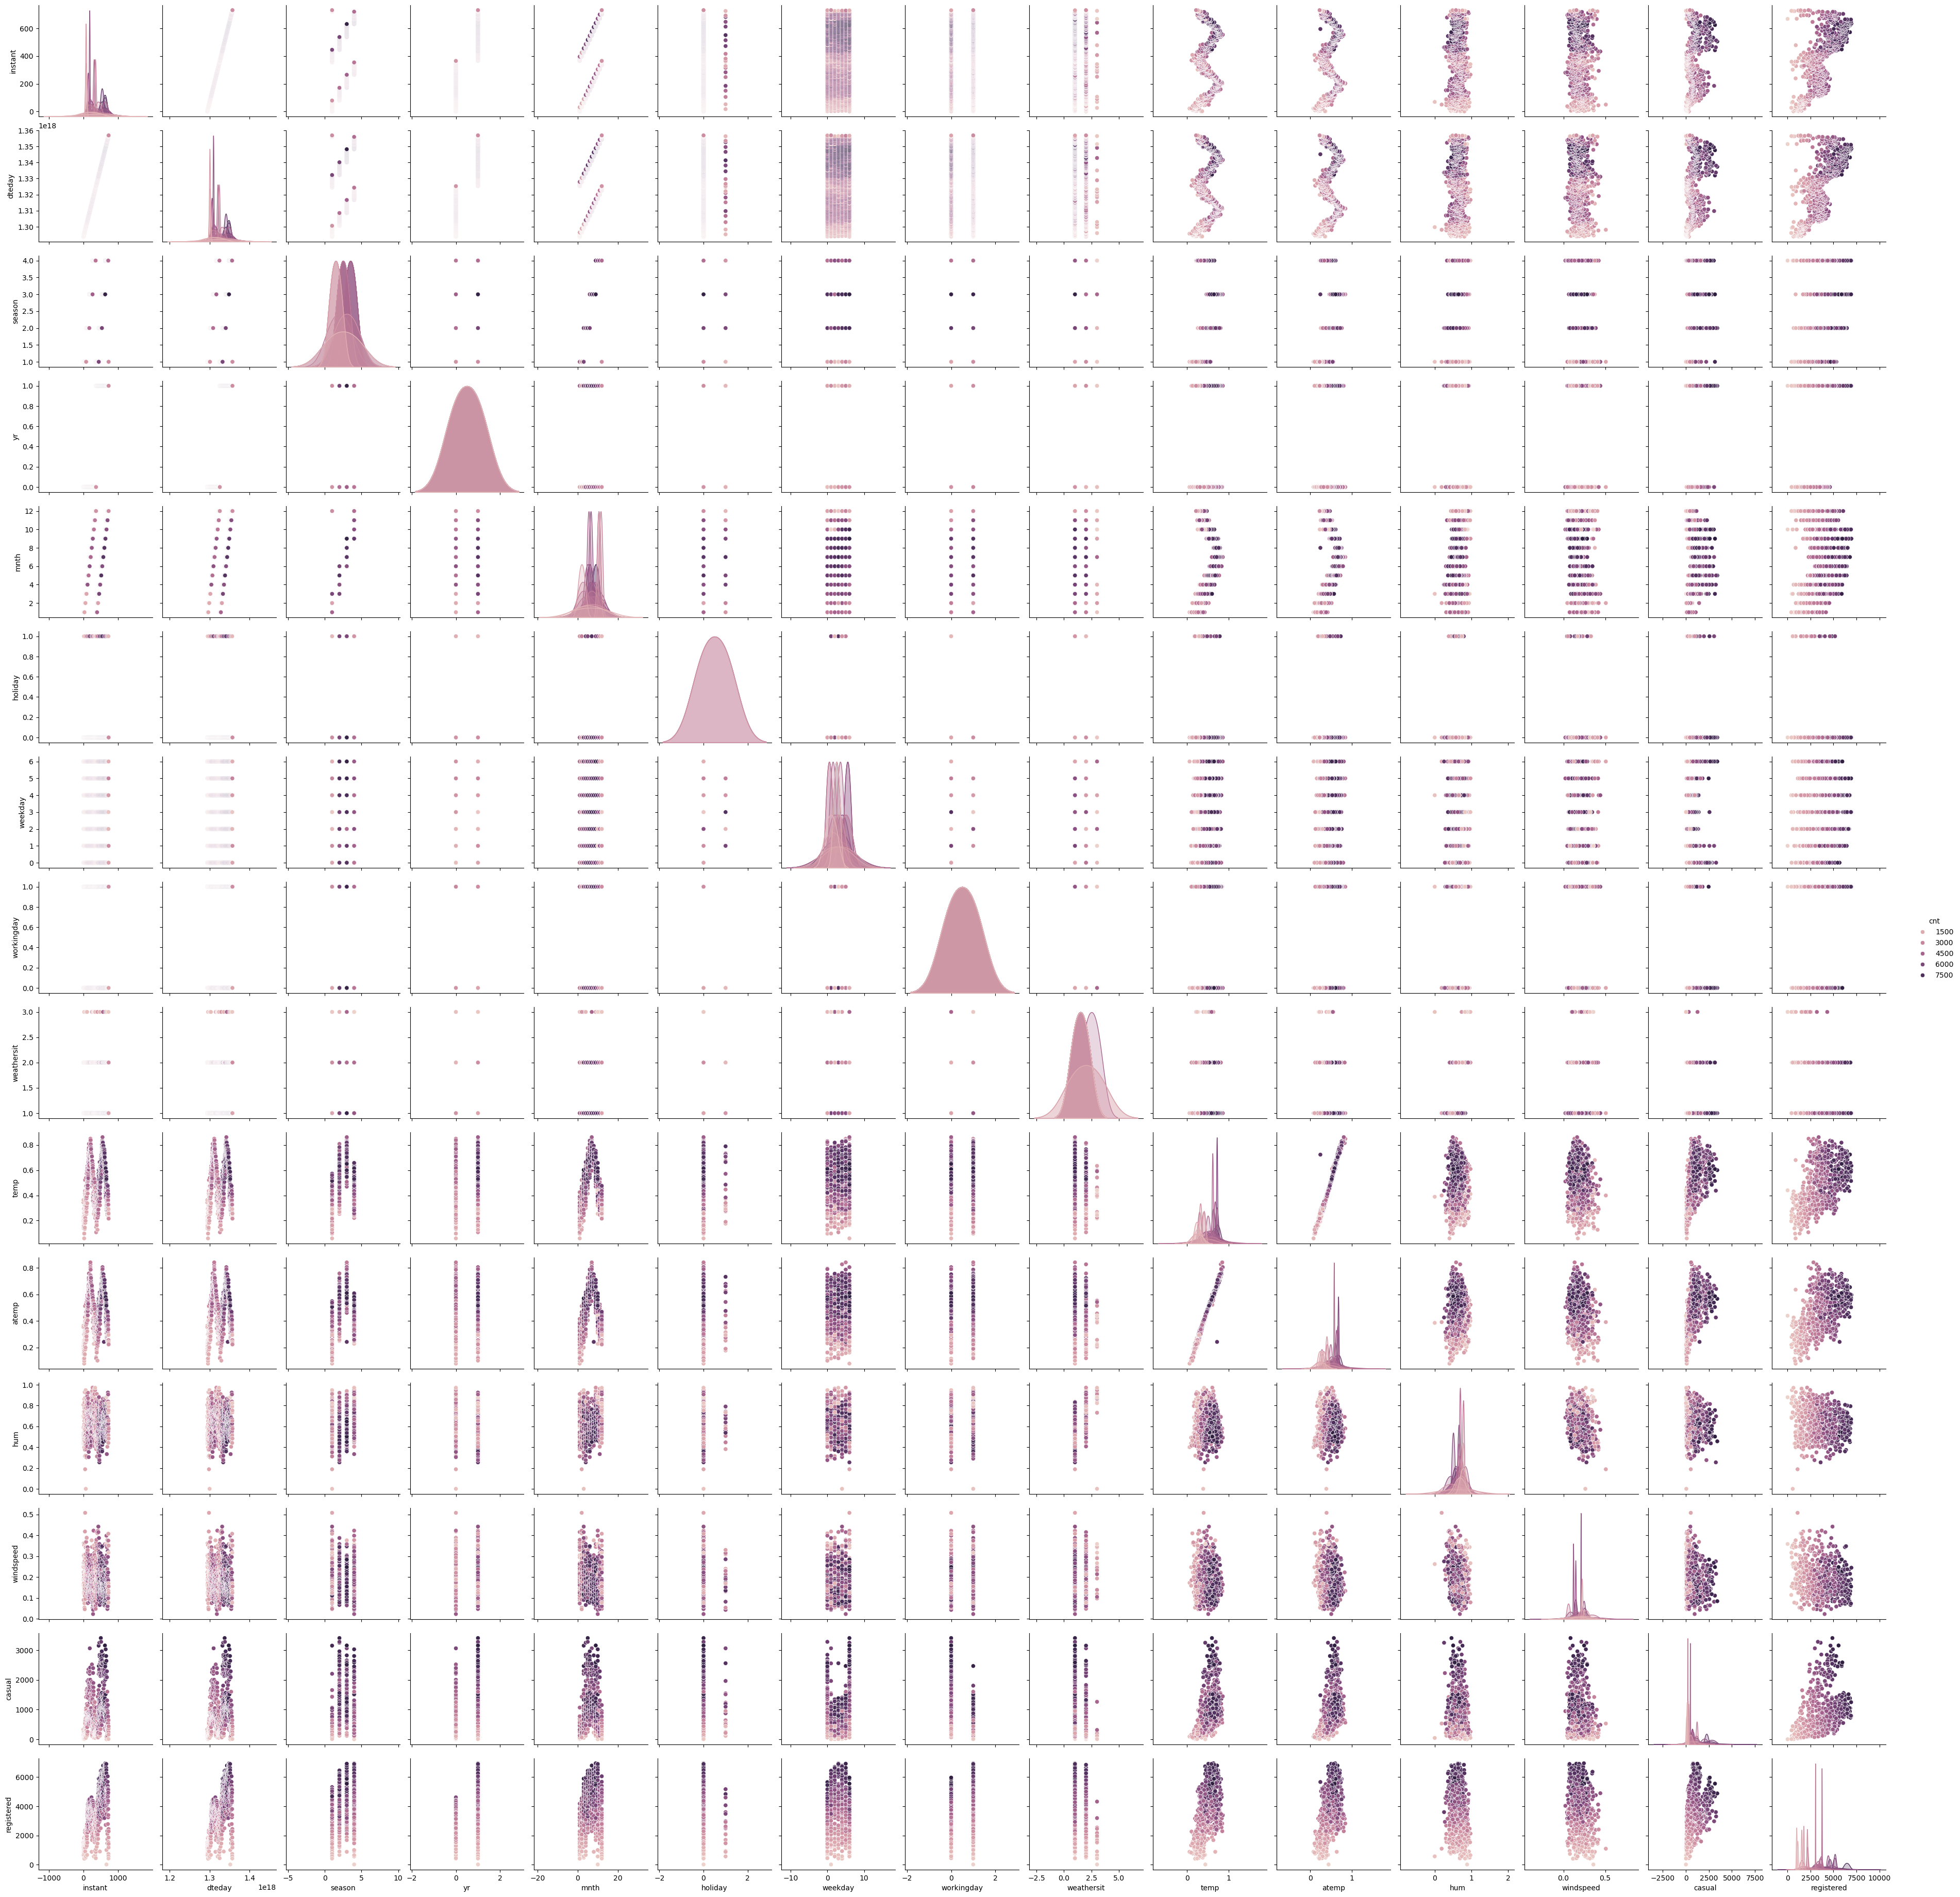

In [40]:
sns.pairplot(data, hue="cnt")  # pairwise scatter plots for all numerical columns 

# Feature Engineering
#### Definition:
  > Feature engineering is the process of creating, modifying, or selecting features. It involve removing outliers, transforming them and also eliminating features that do not contribute meaningful information to the model, Applying transformations to make features more suitable for modeling, and retain the most impactful features, ensuring the model focuses on the most informative inputs. 

### 1.Data Preprocessing
> Data preprocessing is the process of cleaning, transforming, and organizing raw data into a suitable format for analysis or machine learning. It involves several key steps like data cleaning ,data transformation , change in any data type also for dimensionality reduction.

In [56]:
# Finding missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
# create indivisual Day or Year
data["Year"] = pd.to_datetime(data["dteday"]).dt.year # create year column
data["Day"] = pd.to_datetime(data["dteday"]).dt.day  # create day column

In [60]:
data.head() # Displays the first 5 rows

instant               dteday  season  yr  mnth  holiday  weekday  \
0        1  1293840000000000000       1   0     1        0        6   
1        2  1293926400000000000       1   0     1        0        0   
2        3  1294012800000000000       1   0     1        0        1   
3        4  1294099200000000000       1   0     1        0        2   
4        5  1294185600000000000       1   0     1        0        3   

   workingday  weathersit      temp     atemp       hum  windspeed  casual  \
0           0           2  0.344167  0.363625  0.805833   0.160446     331   
1           0           2  0.363478  0.353739  0.696087   0.248539     131   
2           1           1  0.196364  0.189405  0.437273   0.248309     120   
3           1           1  0.200000  0.212122  0.590435   0.160296     108   
4           1           1  0.226957  0.229270  0.436957   0.186900      82   

   registered   cnt  Year  Day  
0         654   985  2011    1  
1         670   801  2011    2  
2        1229  1349  2011    3  
3        1454  1562  2011    4  
4        1518  1600  2011    5

In [62]:
data1 = data.drop(["instant","dteday","yr"],axis=1) # Drop unnecessary columns from data
data1

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered   cnt  Year  Day  
0    0.363625  0.805833   0.160446     331         654   985  2011    1  
1    0.353739  0.696087   0.248539     131         670   801  2011    2  
2    0.189405  0.437273   0.248309     120        1229  1349  2011    3  
3    0.212122  0.590435   0.160296     108        1454  1562  2011    4  
4    0.229270  0.436957   0.186900      82        1518  1600  2011    5  
..        ...       ...        ...     ...         ...   ...   ...  ...  
726  0.226642  0.652917   0.350133     247        1867  2114  2012   27  
727  0.255046  0.590000   0.155471     644        2451  3095  2012   28  
728  0.242400  0.752917   0.124383     159        1182  1341  2012   29  
729  0.231700  0.483333   0.350754     364        1432  1796  2012   30  
730  0.223487  0.577500   0.154846     439        2290  2729  2012   31  

[731 rows x 15 columns]

In [64]:
data1.head() # Displays the first 5 rows

season  mnth  holiday  weekday  workingday  weathersit      temp     atemp  \
0       1     1        0        6           0           2  0.344167  0.363625   
1       1     1        0        0           0           2  0.363478  0.353739   
2       1     1        0        1           1           1  0.196364  0.189405   
3       1     1        0        2           1           1  0.200000  0.212122   
4       1     1        0        3           1           1  0.226957  0.229270   

        hum  windspeed  casual  registered   cnt  Year  Day  
0  0.805833   0.160446     331         654   985  2011    1  
1  0.696087   0.248539     131         670   801  2011    2  
2  0.437273   0.248309     120        1229  1349  2011    3  
3  0.590435   0.160296     108        1454  1562  2011    4  
4  0.436957   0.186900      82        1518  1600  2011    5

In [66]:
contious_columns = data1.select_dtypes(include=["float64","int64"]) # Store float or int value
contious_columns

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered   cnt  
0    0.363625  0.805833   0.160446     331         654   985  
1    0.353739  0.696087   0.248539     131         670   801  
2    0.189405  0.437273   0.248309     120        1229  1349  
3    0.212122  0.590435   0.160296     108        1454  1562  
4    0.229270  0.436957   0.186900      82        1518  1600  
..        ...       ...        ...     ...         ...   ...  
726  0.226642  0.652917   0.350133     247        1867  2114  
727  0.255046  0.590000   0.155471     644        2451  3095  
728  0.242400  0.752917   0.124383     159        1182  1341  
729  0.231700  0.483333   0.350754     364        1432  1796  
730  0.223487  0.577500   0.154846     439        2290  2729  

[731 rows x 13 columns]

#### **Removing/Handling Outliers**
>* Removing outliers is an important step in data preprocessing to ensure data quality. Outliers are data points that differ from the rest samples. To manage, we can identify outliers using methods like the Z-score or Interquartile Range (IQR). you can either remove them, transform them using log, or impute them with the mean or median. Properly handling outliers helps improve model accuracy and analysis.


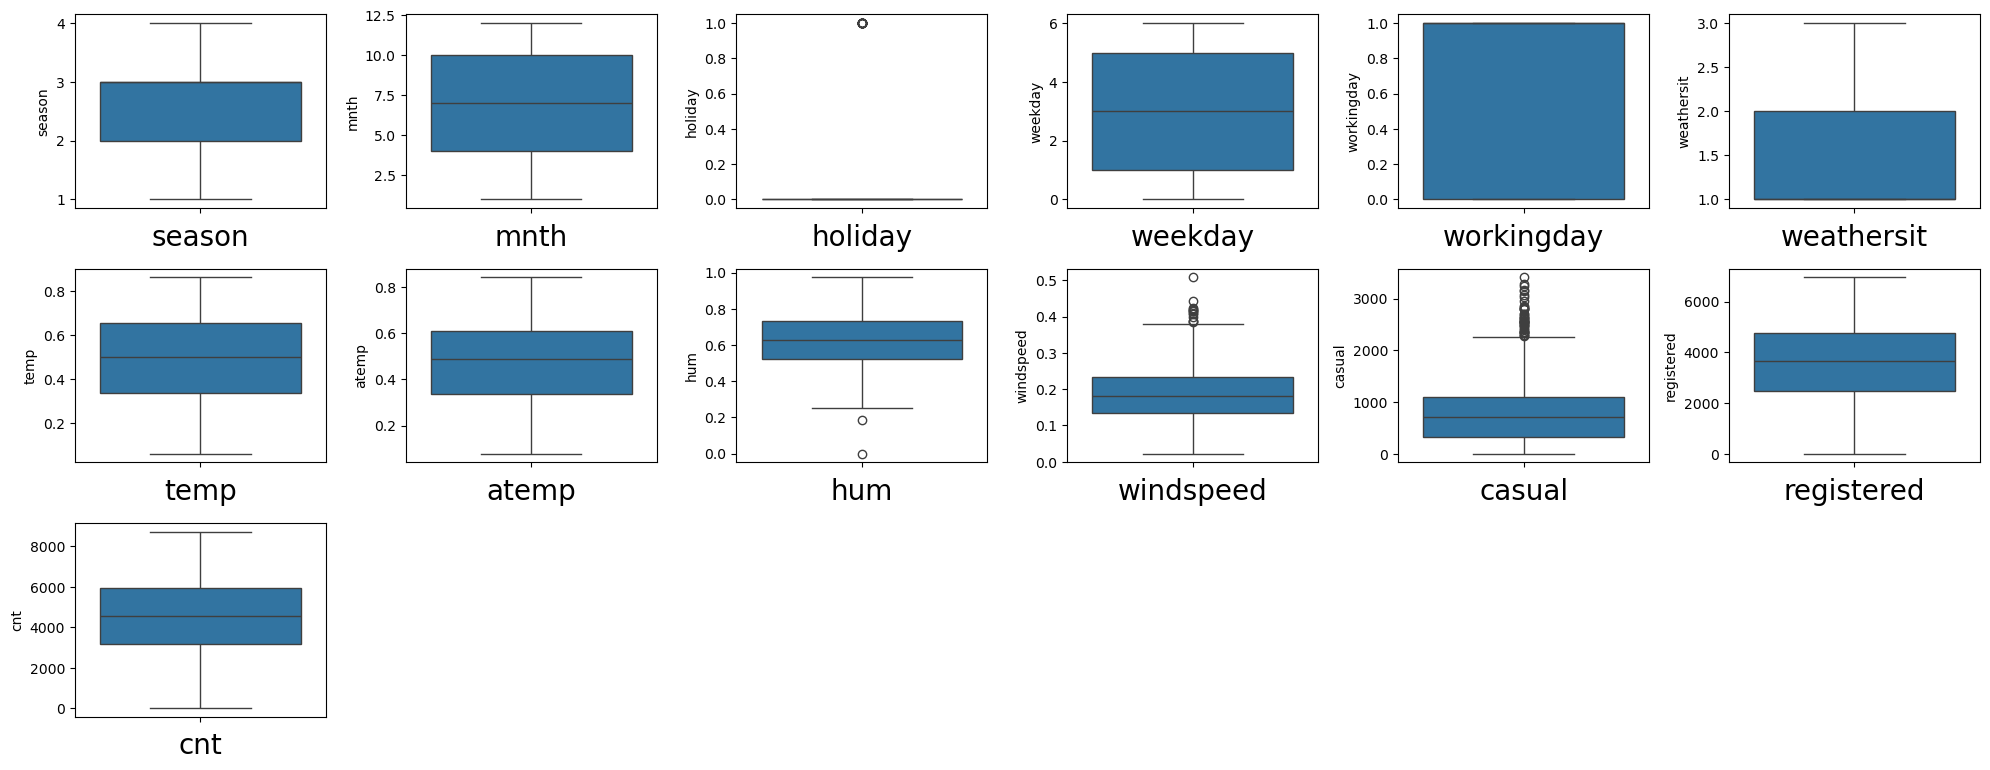

In [69]:
plt.figure(figsize=(20,15))  # Set figure size
plt_num = 1  # Initialize subplot counter
for column in contious_columns:  # Loop through continuous columns
    if plt_num <= 13:  # Limit to 13 plots
        plt.subplot(6, 6, plt_num)  # Create subplot in a 4x4 grid
        sns.boxplot(contious_columns[column])  # Boxplot for the current column
        plt.xlabel(column, fontsize=20)  # Label the x-axis
    plt_num += 1  # Increment subplot counter
plt.tight_layout()  # Adjust layout for better spacing

#### **Analysis**:-
> * Here outliers can be seen in hum, windspeed, casual (features).
> * Here casual (feature) posses maximum outliers.
> * Here hum (feature) posses minimum outliers.

<Axes: xlabel='hum'>

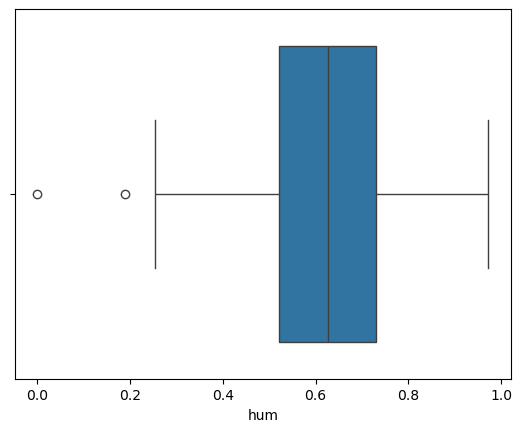

In [71]:
sns.boxplot(x=data1.hum) # Boxplot for the hum column to check the outliers

#### Analysis:-
> * In hum outliers can be seen before 0.2

In [75]:
 np.mean(data1['hum']) # Calculate the mean of the 'hum' column

0.6278940629274967

In [77]:
# For replacing values
data1.loc[data1['hum'] < 0.2, 'hum'] = 0.6278940629274967

<Axes: xlabel='hum'>

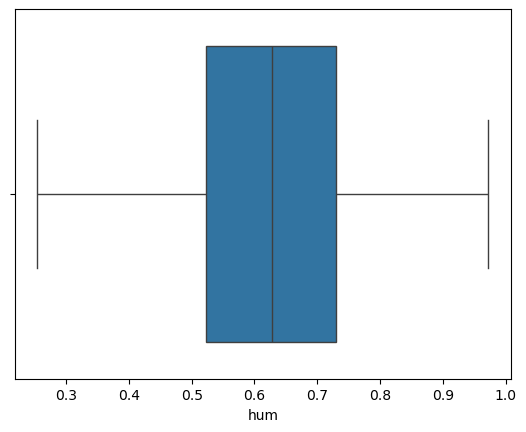

In [79]:
sns.boxplot(x=data1.hum) # After removing outliers   

#### **Analysis**:-
> * Graph after removing outliers of hum (feature)

<Axes: xlabel='windspeed'>

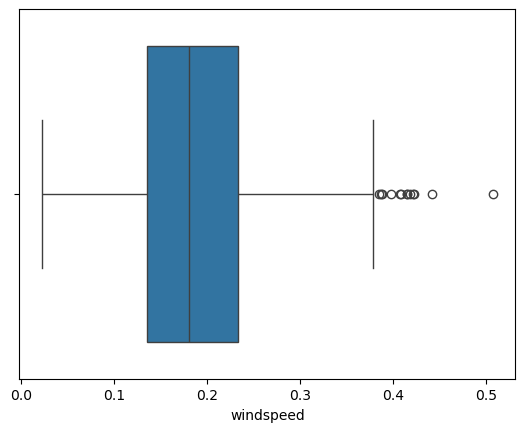

In [82]:
sns.boxplot(x=data1.windspeed) # Boxplot for the windspeed column to check the outliers

#### **Analysis**:-
> * In windspeed outliers can be seen after 0.36 (aproxx)

In [85]:
np.mean(data1['windspeed']) # Calculate the mean of the 'windspeed' column as is follows noramal distribution

0.190486211627907

In [87]:
# For replacing values
data1.loc[data1['windspeed']>0.3,'windspeed'] = 0.190486211627907 

<Axes: xlabel='windspeed'>

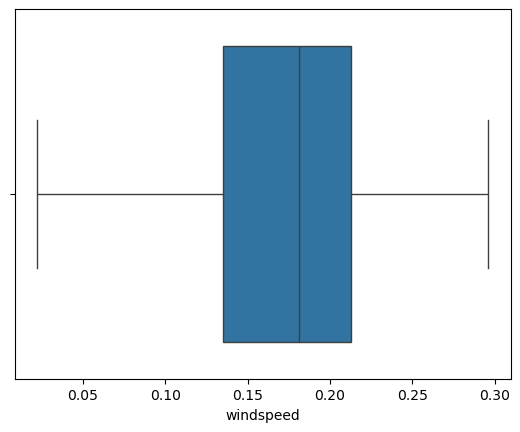

In [89]:
sns.boxplot(x=data1.windspeed) # After removing outliers

#### **Analysis**:-
> * Graph after removing outliers of windspeed (feature)

<Axes: xlabel='casual'>

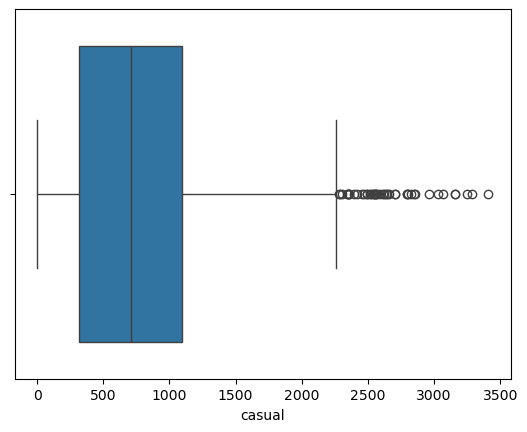

In [92]:
sns.boxplot(x=data1.casual) # Boxplot for the casual column to check the outliers

#### **Analysis**:-
> * In casual outliers can be seen after 2300 (aproxx)

In [95]:
# Calculate Q1, Q3, and IQR of 'casual' column
Q1=data1["casual"].quantile(0.25) # 25th percentile
Q3=data1["casual"].quantile(0.75)# 75th percentile
IQR=Q3-Q1                        # Interquartile Range  
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
data1.loc[(data1["casual"]>upper_bound) | (data1["casual"]<lower_bound),"casual"]= np.median(data1.casual)

<Axes: xlabel='casual'>

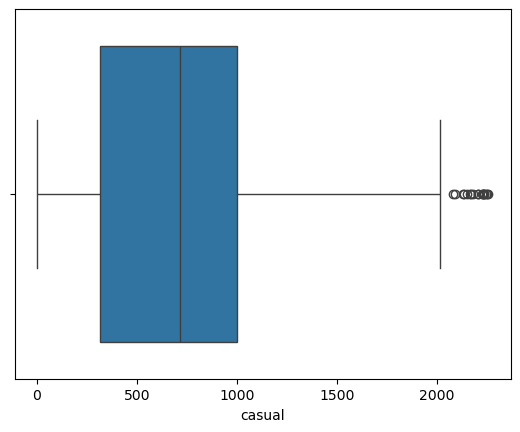

In [97]:
sns.boxplot(x=data1.casual)

#### **Analysis**:-
> * Graph after removing outliers of casual (feature)

### 2. Feature Selection
Feature selection is the process of choosing the most important features (or variables) from a larger set to use in a machine learning model. Helps the model make better predictions. It also Reduces Overfitting of model and makes the model faster to train and easier to understand.



<Axes: >

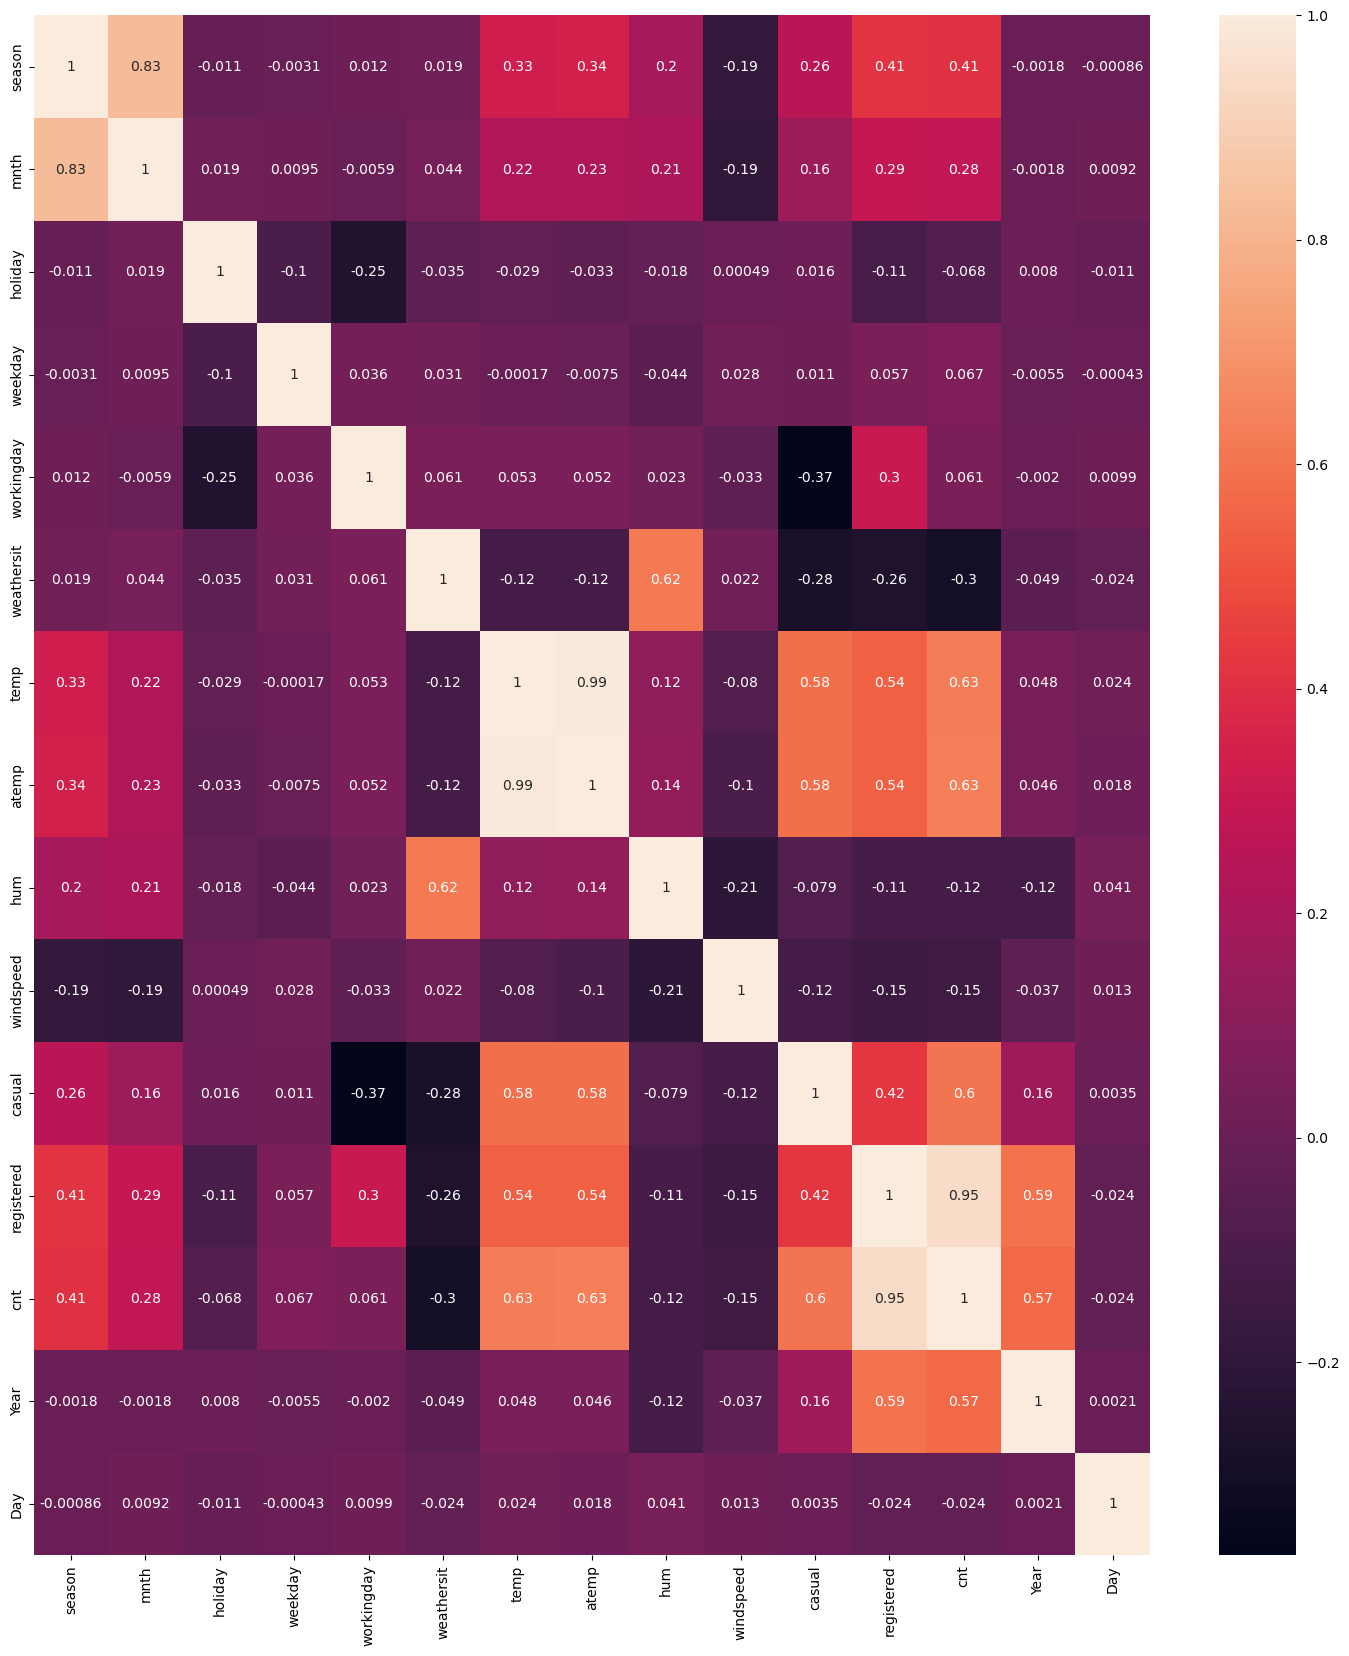

In [101]:
plt.figure(figsize=(18,20)) # Define the plot size
sns.heatmap(data1.corr(),annot=True) # Heatmap check to correlation between features 

#### **Analysis**:-
> * Here two features (atemp,registered) posses correlation more than 90%.
> * Here the features who posses correlation more than 90% should be droped (atemp,registered). 

In [104]:
data1.corr()  #check corrlation

season      mnth   holiday   weekday  workingday  weathersit  \
season      1.000000  0.831440 -0.010537 -0.003080    0.012485    0.019211   
mnth        0.831440  1.000000  0.019191  0.009509   -0.005901    0.043528   
holiday    -0.010537  0.019191  1.000000 -0.101960   -0.253023   -0.034627   
weekday    -0.003080  0.009509 -0.101960  1.000000    0.035790    0.031087   
workingday  0.012485 -0.005901 -0.253023  0.035790    1.000000    0.061200   
weathersit  0.019211  0.043528 -0.034627  0.031087    0.061200    1.000000   
temp        0.334315  0.220205 -0.028556 -0.000170    0.052660   -0.120602   
atemp       0.342876  0.227459 -0.032507 -0.007537    0.052182   -0.121583   
hum         0.195538  0.214823 -0.018066 -0.043753    0.022663    0.618185   
windspeed  -0.185408 -0.192267  0.000485  0.028306   -0.032669    0.021596   
casual      0.258128  0.163407  0.015658  0.010628   -0.372235   -0.277115   
registered  0.411623  0.293488 -0.108745  0.057367    0.303907   -0.260388   
cnt         0.406100  0.279977 -0.068348  0.067443    0.061156   -0.297391   
Year       -0.001844 -0.001792  0.007954 -0.005461   -0.002013   -0.048727   
Day        -0.000861  0.009157 -0.010710 -0.000428    0.009907   -0.023824   

                temp     atemp       hum  windspeed    casual  registered  \
season      0.334315  0.342876  0.195538  -0.185408  0.258128    0.411623   
mnth        0.220205  0.227459  0.214823  -0.192267  0.163407    0.293488   
holiday    -0.028556 -0.032507 -0.018066   0.000485  0.015658   -0.108745   
weekday    -0.000170 -0.007537 -0.043753   0.028306  0.010628    0.057367   
workingday  0.052660  0.052182  0.022663  -0.032669 -0.372235    0.303907   
weathersit -0.120602 -0.121583  0.618185   0.021596 -0.277115   -0.260388   
temp        1.000000  0.991702  0.123719  -0.080123  0.582916    0.540012   
atemp       0.991702  1.000000  0.137308  -0.099591  0.582033    0.544192   
hum         0.123719  0.137308  1.000000  -0.207457 -0.079498   -0.112186   
windspeed  -0.080123 -0.099591 -0.207457   1.000000 -0.121974   -0.149608   
casual      0.582916  0.582033 -0.079498  -0.121974  1.000000    0.423988   
registered  0.540012  0.544192 -0.112186  -0.149608  0.423988    1.000000   
cnt         0.627494  0.631066 -0.121468  -0.146464  0.600282    0.945517   
Year        0.047604  0.046106 -0.123409  -0.037292  0.163970    0.594248   
Day         0.024253  0.018286  0.041214   0.012675  0.003469   -0.024171   

                 cnt      Year       Day  
season      0.406100 -0.001844 -0.000861  
mnth        0.279977 -0.001792  0.009157  
holiday    -0.068348  0.007954 -0.010710  
weekday     0.067443 -0.005461 -0.000428  
workingday  0.061156 -0.002013  0.009907  
weathersit -0.297391 -0.048727 -0.023824  
temp        0.627494  0.047604  0.024253  
atemp       0.631066  0.046106  0.018286  
hum        -0.121468 -0.123409  0.041214  
windspeed  -0.146464 -0.037292  0.012675  
casual      0.600282  0.163970  0.003469  
registered  0.945517  0.594248 -0.024171  
cnt         1.000000  0.566710 -0.024204  
Year        0.566710  1.000000  0.002061  
Day        -0.024204  0.002061  1.000000

In [106]:
data2 = data1.drop(["atemp","registered"],axis=1) # Drop the columns which highly correlated
data2

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

          hum  windspeed  casual   cnt  Year  Day  
0    0.805833   0.160446     331   985  2011    1  
1    0.696087   0.248539     131   801  2011    2  
2    0.437273   0.248309     120  1349  2011    3  
3    0.590435   0.160296     108  1562  2011    4  
4    0.436957   0.186900      82  1600  2011    5  
..        ...        ...     ...   ...   ...  ...  
726  0.652917   0.190486     247  2114  2012   27  
727  0.590000   0.155471     644  3095  2012   28  
728  0.752917   0.124383     159  1341  2012   29  
729  0.483333   0.190486     364  1796  2012   30  
730  0.577500   0.154846     439  2729  2012   31  

[731 rows x 13 columns]

# Model Selection
#### Definition:
>  Model selection is the process of choosing the best machine learning model for a specific task based on its performance with your data. It involves understanding your prediction goal, selecting a few suitable models and it split the dataset in testing and training.

In [109]:
x = data1.drop("cnt", axis=1) # Drop the 'cnt' and store the result in 'x' (independent variables)
y = data1.cnt # Store the 'cnt' column in 'y' (dependent variable)

In [111]:
x # Independent variable

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered  Year  Day  
0    0.363625  0.805833   0.160446     331         654  2011    1  
1    0.353739  0.696087   0.248539     131         670  2011    2  
2    0.189405  0.437273   0.248309     120        1229  2011    3  
3    0.212122  0.590435   0.160296     108        1454  2011    4  
4    0.229270  0.436957   0.186900      82        1518  2011    5  
..        ...       ...        ...     ...         ...   ...  ...  
726  0.226642  0.652917   0.190486     247        1867  2012   27  
727  0.255046  0.590000   0.155471     644        2451  2012   28  
728  0.242400  0.752917   0.124383     159        1182  2012   29  
729  0.231700  0.483333   0.190486     364        1432  2012   30  
730  0.223487  0.577500   0.154846     439        2290  2012   31  

[731 rows x 14 columns]

In [113]:
y # Dependent variable

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split # Import the train test split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) # Split the data in training and testing 

In [116]:
x_test # Independent variables for testing data

season  mnth  holiday  weekday  workingday  weathersit      temp  \
120       2     5        0        0           0           2  0.451667   
498       2     5        0        0           0           1  0.612500   
450       2     3        0        1           1           1  0.445833   
556       3     7        0        2           1           2  0.720833   
188       3     7        0        5           1           2  0.709167   
..      ...   ...      ...      ...         ...         ...       ...   
423       1     2        0        2           1           1  0.359167   
140       2     5        0        6           0           1  0.602500   
62        1     3        0        5           1           2  0.261667   
304       4    11        0        2           1           1  0.400833   
313       4    11        0        4           1           2  0.380000   

        atemp       hum  windspeed  casual  registered  Year  Day  
120  0.448204  0.762083   0.106354    1138        2213  2011    1  
498  0.585238  0.576250   0.225117    2172        3946  2012   13  
450  0.438750  0.477917   0.190486     795        4763  2012   26  
556  0.664796  0.667500   0.151737     954        5336  2012   10  
188  0.670483  0.757917   0.225129     692        3348  2011    8  
..        ...       ...        ...     ...         ...   ...  ...  
423  0.353525  0.395833   0.193417     229        4134  2012   28  
140  0.571975  0.626667   0.120650    2258        3547  2011   21  
62   0.255679  0.610417   0.203346     214        1730  2011    4  
304  0.397088  0.683750   0.135571     410        3658  2011    1  
313  0.373721  0.813333   0.189067     190        2743  2011   10  

[147 rows x 14 columns]

In [117]:
x_train # Independent variables for training data

season  mnth  holiday  weekday  workingday  weathersit      temp  \
462       2     4        0        6           0           1  0.437500   
331       4    11        0        1           1           1  0.503478   
166       2     6        0        4           1           2  0.628333   
106       2     4        0        0           0           1  0.456667   
719       4    12        0        4           1           2  0.330000   
..      ...   ...      ...      ...         ...         ...       ...   
440       1     3        0        5           1           2  0.435833   
165       2     6        0        3           1           1  0.626667   
7         1     1        0        6           0           2  0.165000   
219       3     8        0        1           1           1  0.765000   
326       4    11        0        3           1           2  0.440833   

        atemp       hum  windspeed  casual  registered  Year  Day  
462  0.426129  0.254167   0.274871     713        3605  2012    7  
331  0.490122  0.743043   0.142122     253        3614  2011   28  
166  0.595346  0.688333   0.206471     545        3222  2011   16  
106  0.445696  0.479583   0.190486    1558        2186  2011   17  
719  0.335217  0.667917   0.132463     314        3814  2012   20  
..        ...       ...        ...     ...         ...   ...  ...  
440  0.436229  0.842083   0.113192     548        3830  2012   16  
165  0.587754  0.471667   0.167912     769        4411  2011   15  
7    0.162254  0.535833   0.266804      68         891  2011    8  
219  0.703283  0.592083   0.192175     846        3480  2011    8  
326  0.430537  0.757917   0.190486     112        2454  2011   23  

[584 rows x 14 columns]

# Model Creation
#### Definition:
> Model creation involves collecting and preparing data, selecting an appropriate algorithm, training the model, evaluating its performance.
  The process of building a machine learning model to make predictions or decisions based on data. It evaluate model and tune the model to get
  best model performane.

## LinearRegression

> * Linear regression is model that shows relationship between a dependent variable and one or more independent variables using a
linear equation. To find the best-fitting line that minimizes the difference between predicted and actual values. Simple linear regression 
involves one independent variable, while multiple linear regression involves two or more. This technique is widely used for prediction and 
understanding how changes in independent variables impact the dependent variable.

In [124]:
from sklearn.linear_model import LinearRegression  # Import linear regression model
LR = LinearRegression()  # Create a linear regression model
LR.fit(x_train, y_train) # Train the model with training data

LinearRegression()

In [125]:
y_pred1=LR.predict(x_test) # Predict using testing data

In [128]:
y_train_pred1=LR.predict(x_train) # predict using testing data

In [129]:
y_pred1  # Predicted values for the testing data

array([3473.85850314, 5964.26737647, 5551.95615653, 6430.78245519,
       4138.27085217, 1638.32564015, 5554.10707506, 5150.00207983,
       4832.0955163 , 3283.41400188, 4156.14488571, 4762.75161795,
       3561.36174138, 5456.06245848, 3938.00050885, -235.56375307,
       5191.83045565, 6492.00564104, 7164.91587614, 6437.27819652,
       5235.91596783, 3878.76544923, 3747.40534946, 1864.42747555,
       7561.39376103, 7803.08062599, 2540.05342182, 1289.16837419,
       7426.30159824, 6663.54851476, 3907.49520989, 3920.6189238 ,
       3273.17628365, 5584.66815692, 4896.31067915, 2017.06273978,
       3475.78686501, 7083.44399658, 3836.89706539, 4499.62786083,
       3172.46091404, 4017.30363628, 7024.18880983, 2903.67455815,
       3795.02645722, 7514.56631976, 3729.92957789, 2521.70907366,
       4467.55460996, 2315.16060642, 5103.69077428, 4853.49330743,
       2749.68555061,  809.83527838, 7557.03460545, 2937.42761977,
       6008.75603906, 4352.02431729, 7677.30983346, 1113.18059

In [132]:
y_test # Actual value of testing data

120    3351
498    6118
450    5558
556    6290
188    4040
       ... 
423    4363
140    5805
62     1944
304    4068
313    2933
Name: cnt, Length: 147, dtype: int64

In [134]:
# Import regression metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [136]:
r2_score1 = r2_score(y_test, y_pred1)  # To evaluate model performance of testing data
r2_score1

0.9735539377821075

In [138]:
r2_train_score1=r2_score(y_train,y_train_pred1)  # To evaluate model performance of training data
r2_train_score1

0.9644747393970231

In [140]:
MSE_1=mean_squared_error(y_test,y_pred1) # Check squared error
MSE_1

87983.228881124

In [142]:
MAE_1=mean_absolute_error(y_test,y_pred1) # Chech absolute error 
MAE_1

213.61846154397702

### Desicion Tree Algorithm


> * A decision tree is a algorithm used for classification and regression tasks. It works by splitting the data into subsets based on input features,
creating a tree-like model of decisions. Each node represents a feature, each branch represents a decision rule, and each leaf node represents an 
outcome. Decision trees are easy to interpret and visualize,They can handle both numerical and categorical data and are likly to overfit. 

In [146]:
from sklearn.tree import DecisionTreeRegressor # Import decision tree Regressor model       
DT=DecisionTreeRegressor(max_depth=8) # Create a decision tree model                           
DT.fit(x_train,y_train) # Train the model with training data                  

DecisionTreeRegressor(max_depth=8)

In [148]:
y_pred2=DT.predict(x_test)  # Predict using testing data

In [150]:
y_train_pred2=DT.predict(x_train)  # Predict using training data

In [152]:
r2_score2=r2_score(y_test,y_pred2) # To evaluate model performance of testing data
r2_score2

0.9833513661334667

In [154]:
r2_train_score2=r2_score(y_train,y_train_pred2)  # To evaluate model performance of training data
r2_train_score2

0.9986990979760233

In [156]:
MSE_2=mean_squared_error(y_test,y_pred2) # Check squared error
MSE_2

55388.229520469074

In [158]:
MAE_2=mean_absolute_error(y_test,y_pred2) # Chech absolute error 
MAE_2

171.6640011915522

### RandomForestRegressor

> * Random Forest Regressor is a regression algorithm that creates multiple decision trees and combines their predictions to improve accuracy and reduce
overfitting. Each tree is trained on a random subset of the data, and the final output is the average of all trees predictions. It is effective for
handling complex datasets and provides insights about feature importance.

In [162]:
from sklearn.ensemble import RandomForestRegressor  # Import random forest regressor model
RF=RandomForestRegressor()   # Create a random forest model                        
RF.fit(x_train,y_train)   # Train the model with training data                        

RandomForestRegressor()

In [164]:
y_pred3=RF.predict(x_test) # Predict using testing data

In [166]:
y_train_pred3=RF.predict(x_train) # Predict using training data

In [168]:
r2_score3=r2_score(y_test,y_pred3) # To evaluate model performance of testing data
r2_score3

0.9932679897831332

In [170]:
r2_train_score3=r2_score(y_train,y_train_pred3) # To evaluate model performance of training data
r2_train_score3

0.9984460365466854

In [172]:
MSE_3=mean_squared_error(y_test,y_pred3) # Check squared error
MSE_3

22396.68011292518

In [174]:
MAE_3=mean_absolute_error(y_test,y_pred3) # Chech absolute error 
MAE_3

102.64204081632656

### KNN:- K Nearest Neigbour

> * KNN (K-Nearest Neighbors) is a regression algorithm that predicts the value of a target variable based on the average of the values of its nearest
neighbors in the feature space. It works by identifying the 'k' closest data points to a given input and calculating their average to make a prediction.
KNN is simple to implement and effective for small to medium-sized datasets, but it can be sensitive to the choice of 'k' and may struggle with
high-dimensional data.

In [178]:
from sklearn.neighbors import KNeighborsRegressor # Import K Neighbors Regressor model
KNN = KNeighborsRegressor() # Create a  k neighbors  model
KNN.fit(x_train,y_train)  # Train the model with training data

KNeighborsRegressor()

In [180]:
y_pred4=KNN.predict(x_test)  # Predict using testing data

In [182]:
y_train_pred4=KNN.predict(x_train) # Predict using training data

In [184]:
r2_score4=r2_score(y_test,y_pred4) # To evaluate model performance of testing data
r2_score4

0.9519740837509486

In [186]:
r2_train_score4=r2_score(y_train,y_train_pred4) # To evaluate model performance of training data
r2_train_score4

0.9657770376822503

In [188]:
MSE_4=mean_squared_error(y_test,y_pred4) # Check squared error
MSE_4

159777.10204081633

In [189]:
MAE_4=mean_absolute_error(y_test,y_pred4) # Chech absolute error  
MAE_4

199.6789115646259

## Gradient Boosting

> * Gradient Boosting is a regression algorithm that builds a model in a stage-wise by combining the predictions of multiple weak learners, commenly 
decision trees. It works by fitting new trees to the predict errors of the existing model, gradually improving accuracy. Each tree is trained to 
correct the mistakes of the previous ones, and the final prediction is the weighted sum of all trees' outputs. Gradient Boosting is effective for 
handling complex datasets and can achieve high predictive performance, but it require careful tuning of parameters to avoid overfitting.

In [192]:
from sklearn.ensemble import GradientBoostingRegressor  # Import Gradient Boosting Regressor model
GB=GradientBoostingRegressor()  # Create a gradient boosting model                         
GB.fit(x_train,y_train) # Train the model with training data

GradientBoostingRegressor()

In [193]:
y_pred5=GB.predict(x_test) # Predict using testing data

In [194]:
y_train_pred5=GB.predict(x_train) # Predict using training data

In [195]:
r2_score5=r2_score(y_test,y_pred5)  # To evaluate model performance of testing data
r2_score5

0.9906170545622872

In [196]:
r2_train_score5=r2_score(y_train,y_train_pred5) # To evaluate model performance of training data
r2_train_score5

0.9965389389713974

In [197]:
MSE_5=mean_squared_error(y_test,y_pred5) # Check squared error
MSE_5

31216.0589059967

In [198]:
MAE_5=mean_absolute_error(y_test,y_pred5) # Chech absolute error 
MAE_5

126.17680119723289

## Extreme Gradient Boosting

> * Extreme Gradient Boosting (XGBoost) is a regression algorithm that utilizes decision trees to improve prediction accuracy. It builds models orderly,
each new tree corrects errors made by the previous ones, optimizing performance through techniques like regularization. XGBoost is effective for large
datasets and widely used in machine learning algorithm due to its speed and performance. 

In [210]:
!pip install xgboost

In [211]:
from xgboost import XGBRegressor # Import XGB Regressor  model 
XGB=XGBRegressor() # Create a xgb  model                
XGB.fit(x_train,y_train)  # Train the model with training data  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [212]:
y_pred6=XGB.predict(x_test) # Predict using testing data

In [213]:
y_train_pred6=XGB.predict(x_train) # Predict using training data

In [214]:
r2_score6=r2_score(y_test,y_pred6)  # To evaluate model performance of testing data
r2_score6

0.9938332624855926

In [215]:
r2_train_score6=r2_score(y_train,y_train_pred6)  # To evaluate model performance of training data
r2_train_score6

0.9999993853631005

In [216]:
MSE_6=mean_squared_error(y_test,y_pred6) # Check squared error
MSE_6

20516.07811059448

In [217]:
MAE_6=mean_absolute_error(y_test,y_pred6) # Chech absolute error 
MAE_6

101.23983660847152

## SVM (Support Vector Machine)

> * Support Vector Machine (SVM) for regression, also known as Support Vector Regression (SVR), is a technique used to predict numbers. It finds a line
that best represents the data points. SVR aims to keep most points close to this line, allowing for some mistakes. It works well for understanding
complicated patterns in the data and can handle outliers effectively.

In [220]:
from sklearn.svm import SVR # Import SVR model from svm
svr=SVR()  # Create a svr model
svr.fit(x_train,y_train) # Train the model with training data

SVR()

In [221]:
y_pred7=svr.predict(x_test) # Predict using testing data

In [232]:
y_train_pred7=svr.predict(x_train) # Predict using training data

In [234]:
r2_score7=r2_score(y_test,y_pred7) # To evaluate model performance of testing data
r2_score7

0.07353188024431179

In [236]:
r2_train_score7=r2_score(y_train,y_train_pred7) # To evaluate model performance of training data
r2_train_score7

0.07340861787957753

In [238]:
MSE_7=mean_squared_error(y_test,y_pred7) # Check squared error
MSE_7

3082260.639029283

In [240]:
MAE_7=mean_absolute_error(y_test,y_pred7) # Chech absolute error 
MAE_7

1416.6343609776986

## Bagging Algorithm

>* Bagging is an algorithm that improves the accuracy of predictions by combining multiple models. It works by creating several grpoups of the training
data, each used to train a separate model, commonly in decision trees. Each model makes its own predictions, and the final output is deciding by 
averaging the predictions (for regression) or taking a majority vote (for classification). This helps to reduce overfitting and makes the model more
strong, it perform better on new, unseen data. 

In [244]:
from sklearn.ensemble import BaggingRegressor # Import Bagging Regressor model
BR = BaggingRegressor() # Create a bagging model
BR.fit(x_train,y_train) # Train the model with training data 

BaggingRegressor()

In [246]:
y_pred8=BR.predict(x_test) # Predict using testing data

In [248]:
 y_train_pred8=BR.predict(x_train) # Predict using training data

In [250]:
r2_score8=r2_score(y_test,y_pred8) # To evaluate model performance of testing data
r2_score8

0.9904890596838299

In [252]:
r2_train_score8=r2_score(y_train,y_train_pred8)  # To evaluate model performance of training data
r2_train_score8

0.9974998579458165

In [254]:
MSE_8=mean_squared_error(y_test,y_pred8) # Check squared error
MSE_8

31641.884217687064

In [256]:
MAE_8=mean_absolute_error(y_test,y_pred8) # Chech absolute error 
MAE_8

119.72108843537413

## ANN ( Artificial Neural Network)

>* Artificial Neural Networks (ANN) are powerful machine learning models that work as human brain's structure to process data. They consist of layers 
of interconnected neurons that learn from data through training, to make accurate predictions in various applications.  ANNs can model complex
relationships in data, making them suitable for a wide range of applications, from image and speech recognition to financial forecasting.

In [260]:
from sklearn.neural_network import MLPRegressor  # Import MLPRegressor model
ANN = MLPRegressor(hidden_layer_sizes=(50, 3),  # 50 neurons in 1st layer, 3 in 2nd
                   learning_rate_init=0.1,      # Initial learning rate
                   max_iter=100,                # Max training iterations
                   random_state=2)              # Random seed for reproducibility
ANN.fit(x_train, y_train)  # Train the model with training data

MLPRegressor(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
             random_state=2)

In [261]:
y_pred9 = ANN.predict(x_test) # Predict using testing data

In [264]:
y_train_pred9 =ANN.predict(x_train) # Predict using training data

In [266]:
r2_score9=r2_score(y_test,y_pred9) # To evaluate model performance of testing data
r2_score9

0.9609867263256835

In [268]:
r2_train_score9=r2_score(y_train,y_train_pred9) # To evaluate model performance of training data
r2_train_score9

0.9234394745326646

In [270]:
MSE_9=mean_squared_error(y_test,y_pred9) # Check squared error
MSE_9

129793.0012721139

In [272]:
MAE_9=mean_absolute_error(y_test,y_pred9) # Chech absolute error 
MAE_9

152.9863577273757

In [274]:
# Create a DataFrame to store model performance metrics
# Calculate R2_score, MSEand MAE
score = pd.DataFrame({"Model":["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","KNN","GradiantBoosting","XGBRegressor","SVM","Bagging","ANN_MLPRegressor"],
                     "r2_score":[r2_score1*100,r2_score2*100,r2_score3*100,r2_score4*100,r2_score5*100,r2_score6*100,r2_score7*100,r2_score8*100,r2_score9*100],
                     "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,MSE_8,MSE_9],
                     "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_5,MAE_6,MAE_7,MAE_8,MAE_9]})
score

Model   r2_score           MSE          MAE
0       LinearRegression  97.355394  8.798323e+04   213.618462
1  DecisionTreeRegressor  98.335137  5.538823e+04   171.664001
2  RandomForestRegressor  99.326799  2.239668e+04   102.642041
3                    KNN  95.197408  1.597771e+05   199.678912
4       GradiantBoosting  99.061705  3.121606e+04   126.176801
5           XGBRegressor  99.383326  2.051608e+04   101.239837
6                    SVM   7.353188  3.082261e+06  1416.634361
7                Bagging  99.048906  3.164188e+04   119.721088
8       ANN_MLPRegressor  96.098673  1.297930e+05   152.986358

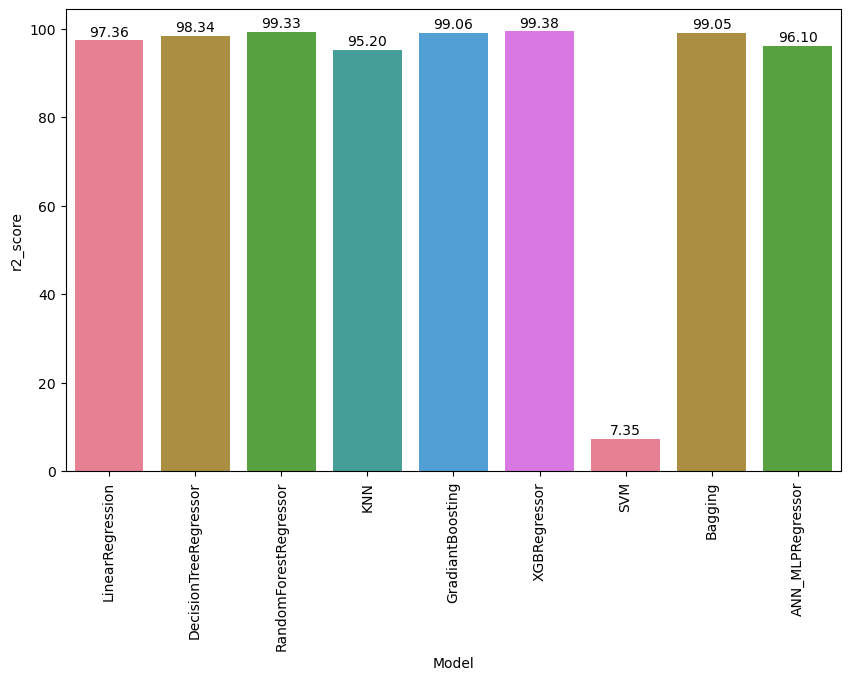

In [276]:
palette = sns.color_palette("husl") # Create Color palette
plt.figure(figsize=(10, 6)) # Figure size for plot
plt.xticks(rotation=90)  # Rotate x labels
a = sns.barplot(x=score.Model, y=score.r2_score, data=score, palette=palette)  # Create Bar plot

for index, value in enumerate(score['r2_score']):  # Loop through each scores
    a.text(index, value + 1, f'{value:.2f}', ha='center')  # Display r2score above bar

#### **Analysis**:-
>* XGBRegressor model achieves highest R2 score (99.38%), shows it is the best-performing model in this comparison.
>* Random Forest Regressor (99.34%) and Gradiant Boosting (99.07%) also perform well, with high model accuracy.
>* Bagging achieves an score of 99.01%, which is also recomendable model perfromance. 
>* SVM performed poorly with 7.35% which is lowest-performing model.
>*  Models like LinearRegression (97.36%), DecisionTree (98.33%) and ANN_MLP (96.10%) perform well with Average accuracy . 

## Final Report 
> * I have implemented nine algorithms in analysis, which include Linear Regression, Decision Tree, Random Forest ,K-Nearest Neighbors (KNN) ,Gradient      Boosting, XGBoost, SVM (Support Vector Machine), Bagging and ANN ( Artificial Neural Network).
> * I have calculated the R² score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) to evaluate the performance of the best models.
> * The XGBoost model has shown outstanding performance, achieving an R² score of 99.38%.
> * The Support Vector Machine (SVM) model has performed poorly, with an R² score of just 7.35%.
> * Nearly all models demonstrated strong performance, achieving R² scores of over 95%.

### Report on Challenges faced
> * Outliers are present in both the "hum","windspeed", "casual" features, which may lead to issues with the data
> * A challenge was converting the 'dteday' column to datetime and then to int64 while ensuring data accuracy.
> * The Support Vector Machine (SVM) model exhibited poor performance, achieving an R² score of just 7.35%.
> * I was unable to perform hyperparameter tuning due to certain constraints.

# Save Model 

In [282]:
import pickle  # Import pickle 
with open("Model.pkl", "wb") as f:  # Open file in write-binary 
    pickle.dump(XGB, f)  # Save XGB model to file

In [284]:
with open("Model.pkl", "rb") as f:  # Open file in read-binary
    model = pickle.load(f)  # Load the model from file

In [286]:
model # Display the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [288]:
x.head() # Displays the first 5 rows

season  mnth  holiday  weekday  workingday  weathersit      temp     atemp  \
0       1     1        0        6           0           2  0.344167  0.363625   
1       1     1        0        0           0           2  0.363478  0.353739   
2       1     1        0        1           1           1  0.196364  0.189405   
3       1     1        0        2           1           1  0.200000  0.212122   
4       1     1        0        3           1           1  0.226957  0.229270   

        hum  windspeed  casual  registered  Year  Day  
0  0.805833   0.160446     331         654  2011    1  
1  0.696087   0.248539     131         670  2011    2  
2  0.437273   0.248309     120        1229  2011    3  
3  0.590435   0.160296     108        1454  2011    4  
4  0.436957   0.186900      82        1518  2011    5

In [290]:
# Make a prediction with model
model.predict([[1,	1,	0,	0,	0,	2,	0.363478,	0.353739,	0.696087,	0.248539,	131,	670,	2011,	2 ]])

array([801.5298], dtype=float32)

<h1 style= "text-align: center;"><strong>Thank_You</strong></h1>